# Assignment 1.

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2021/wiki/Assignment-1-and-2) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 1st, 2021 at 23:55. Hand in your files via [`http://peergrade.io`](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Monday March 8th, 2021 at 23:55.

# We are using only partial data from the .csv file 

## Part 1: Temporal Patterns

We look only at the focus-crimes in the exercise below

In [ ]:
focuscrimes = sorted(set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']))

*Exercise*: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year).  

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 1. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (a couple of ideas below for things that could be interesting to comment on ... but it's OK to chose something else).


In [ ]:
# Importing the needed libaries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
import folium
import seaborn as sns


In [ ]:
# Loading the dataset 
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
# Removing the reports from 2018
data = data[pd.DatetimeIndex(data['Date']).year != 2018]


#### Question: *Weekly patterns*
Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/weekdays.png). Hint for comment: Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?

#### Answer

In the figures below are the different focus crimes plotted by weekday and the number of occurrences. There are some patterns one would expect for example the most reports for `DRUNKENNESS` are in the weekend and `DRIVING UNDER INFLUENCE`  also increases in the weekend. But surprisingly does `DRUG/NARCOTIC` decrease in the weekend.  
There are also some other strange patterns in the plot, for example if one look closer at `PROSTITUTION` then the highest report count is on Thursday but lowest on Sundays and Mondays. Another surprising thing is `DISORDERLY CONDUCT` decreases on Fridays, one would expect it increases in the weekend like the pattern seen in `DRUNKENNESS`.



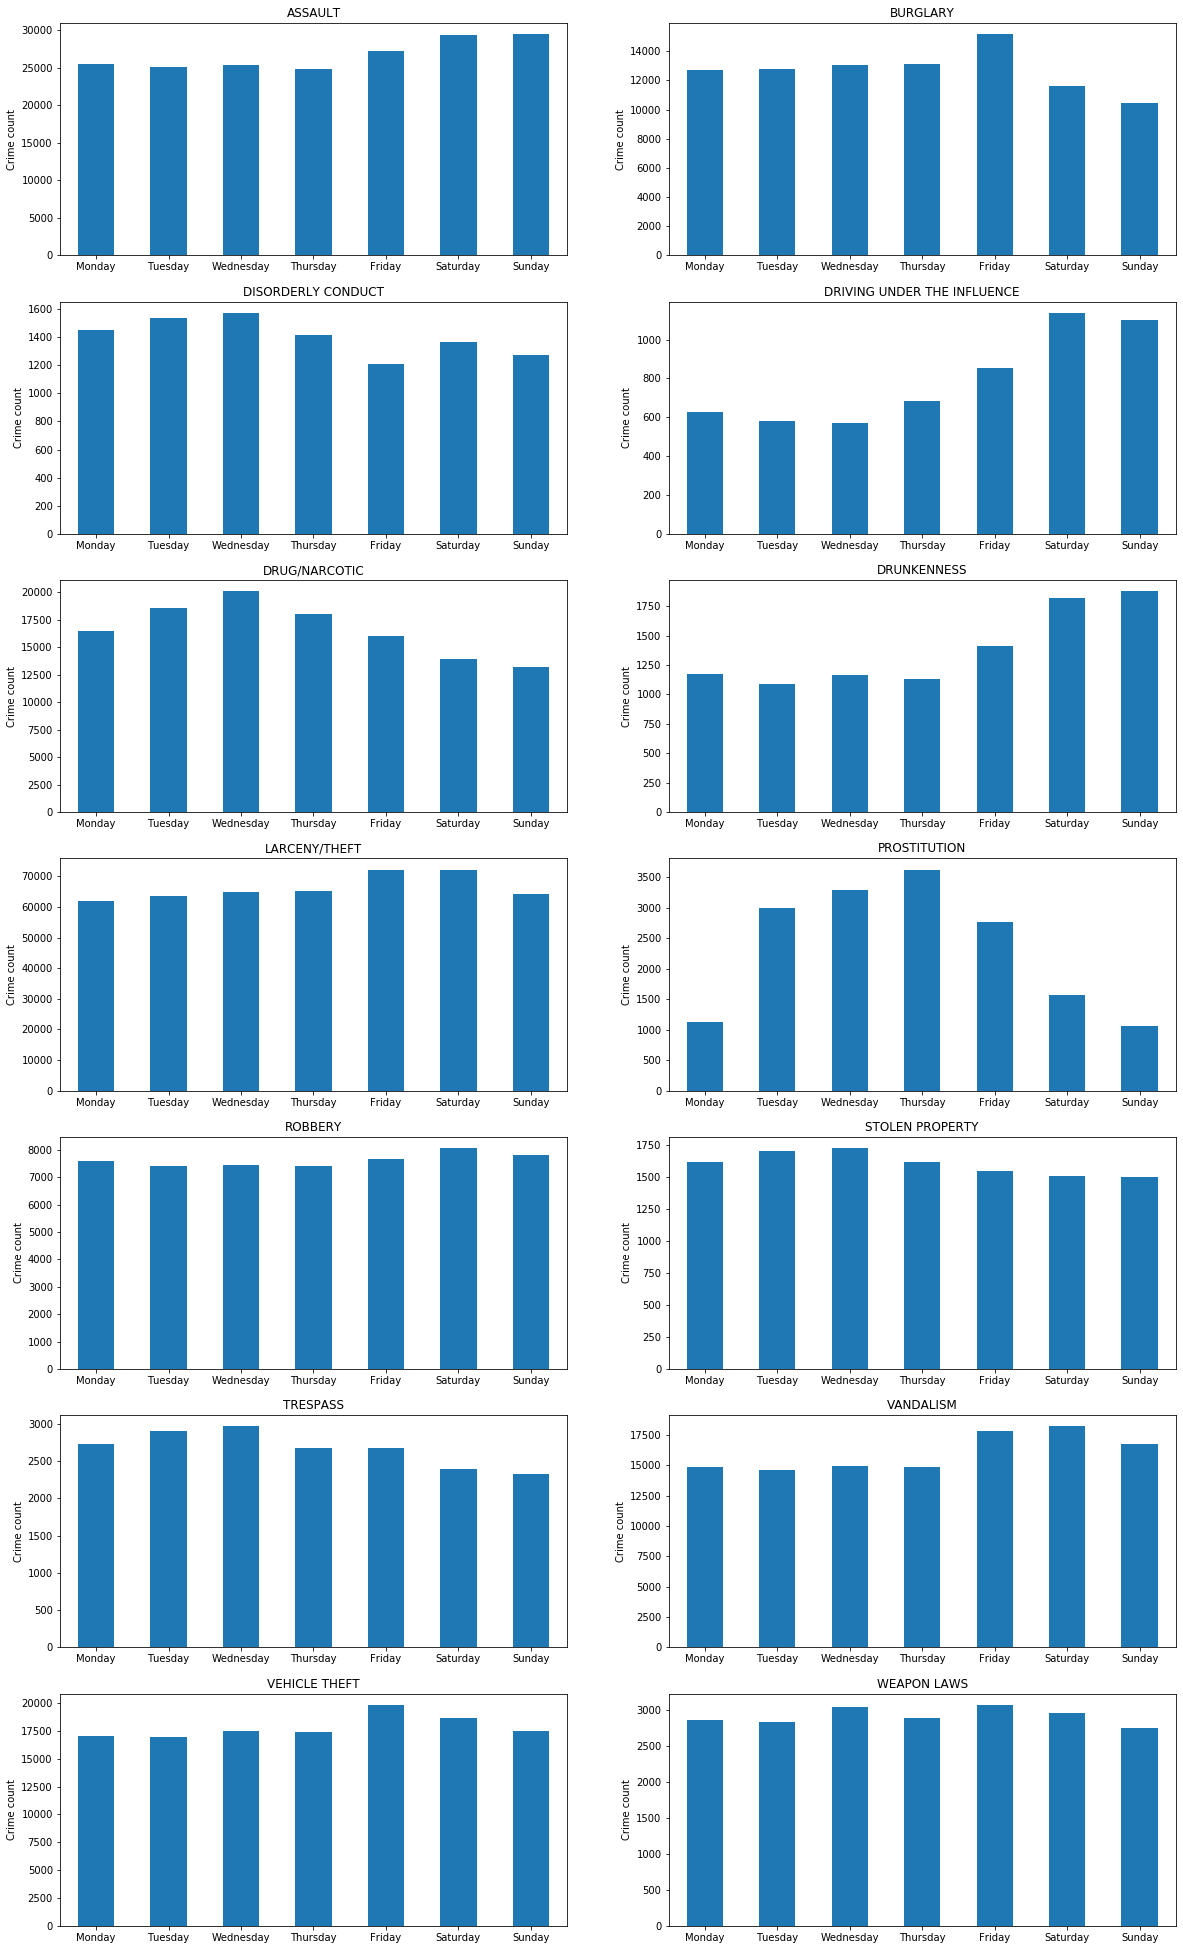

In [ ]:
# Assigning the day of the week to a list 
week = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"] 

# Bar plots for each focus crime where the bars is the differnt day of week 
fig=plt.figure(figsize=(20,35))
j = 0
for i in focuscrimes:
    ax = plt.subplot(7,2,j+1)
    data[data.Category==i].DayOfWeek.value_counts().reindex(week).plot(kind='bar',title=i)
    j=j+1
    plt.ylabel('Crime count')
    plt.xticks(rotation=0)

#### Question: *The months*
We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
#### Answer: 
In the plots below the focus crimes are plotted by the month and the crime count. The occurrence of many of the crimes is low in June for example `DRUG/NARCOTIC` and `DISORDERLY CONDUCT`. Those two also have a minimum in December and then increases in January.  
A surprising occurrence is `DRIVING UNDER INFLUENCE` first peaks in May and then has a minimum in June.
Again, `PROSTITUTION` does also have some surprising peaks in January, April and August. 


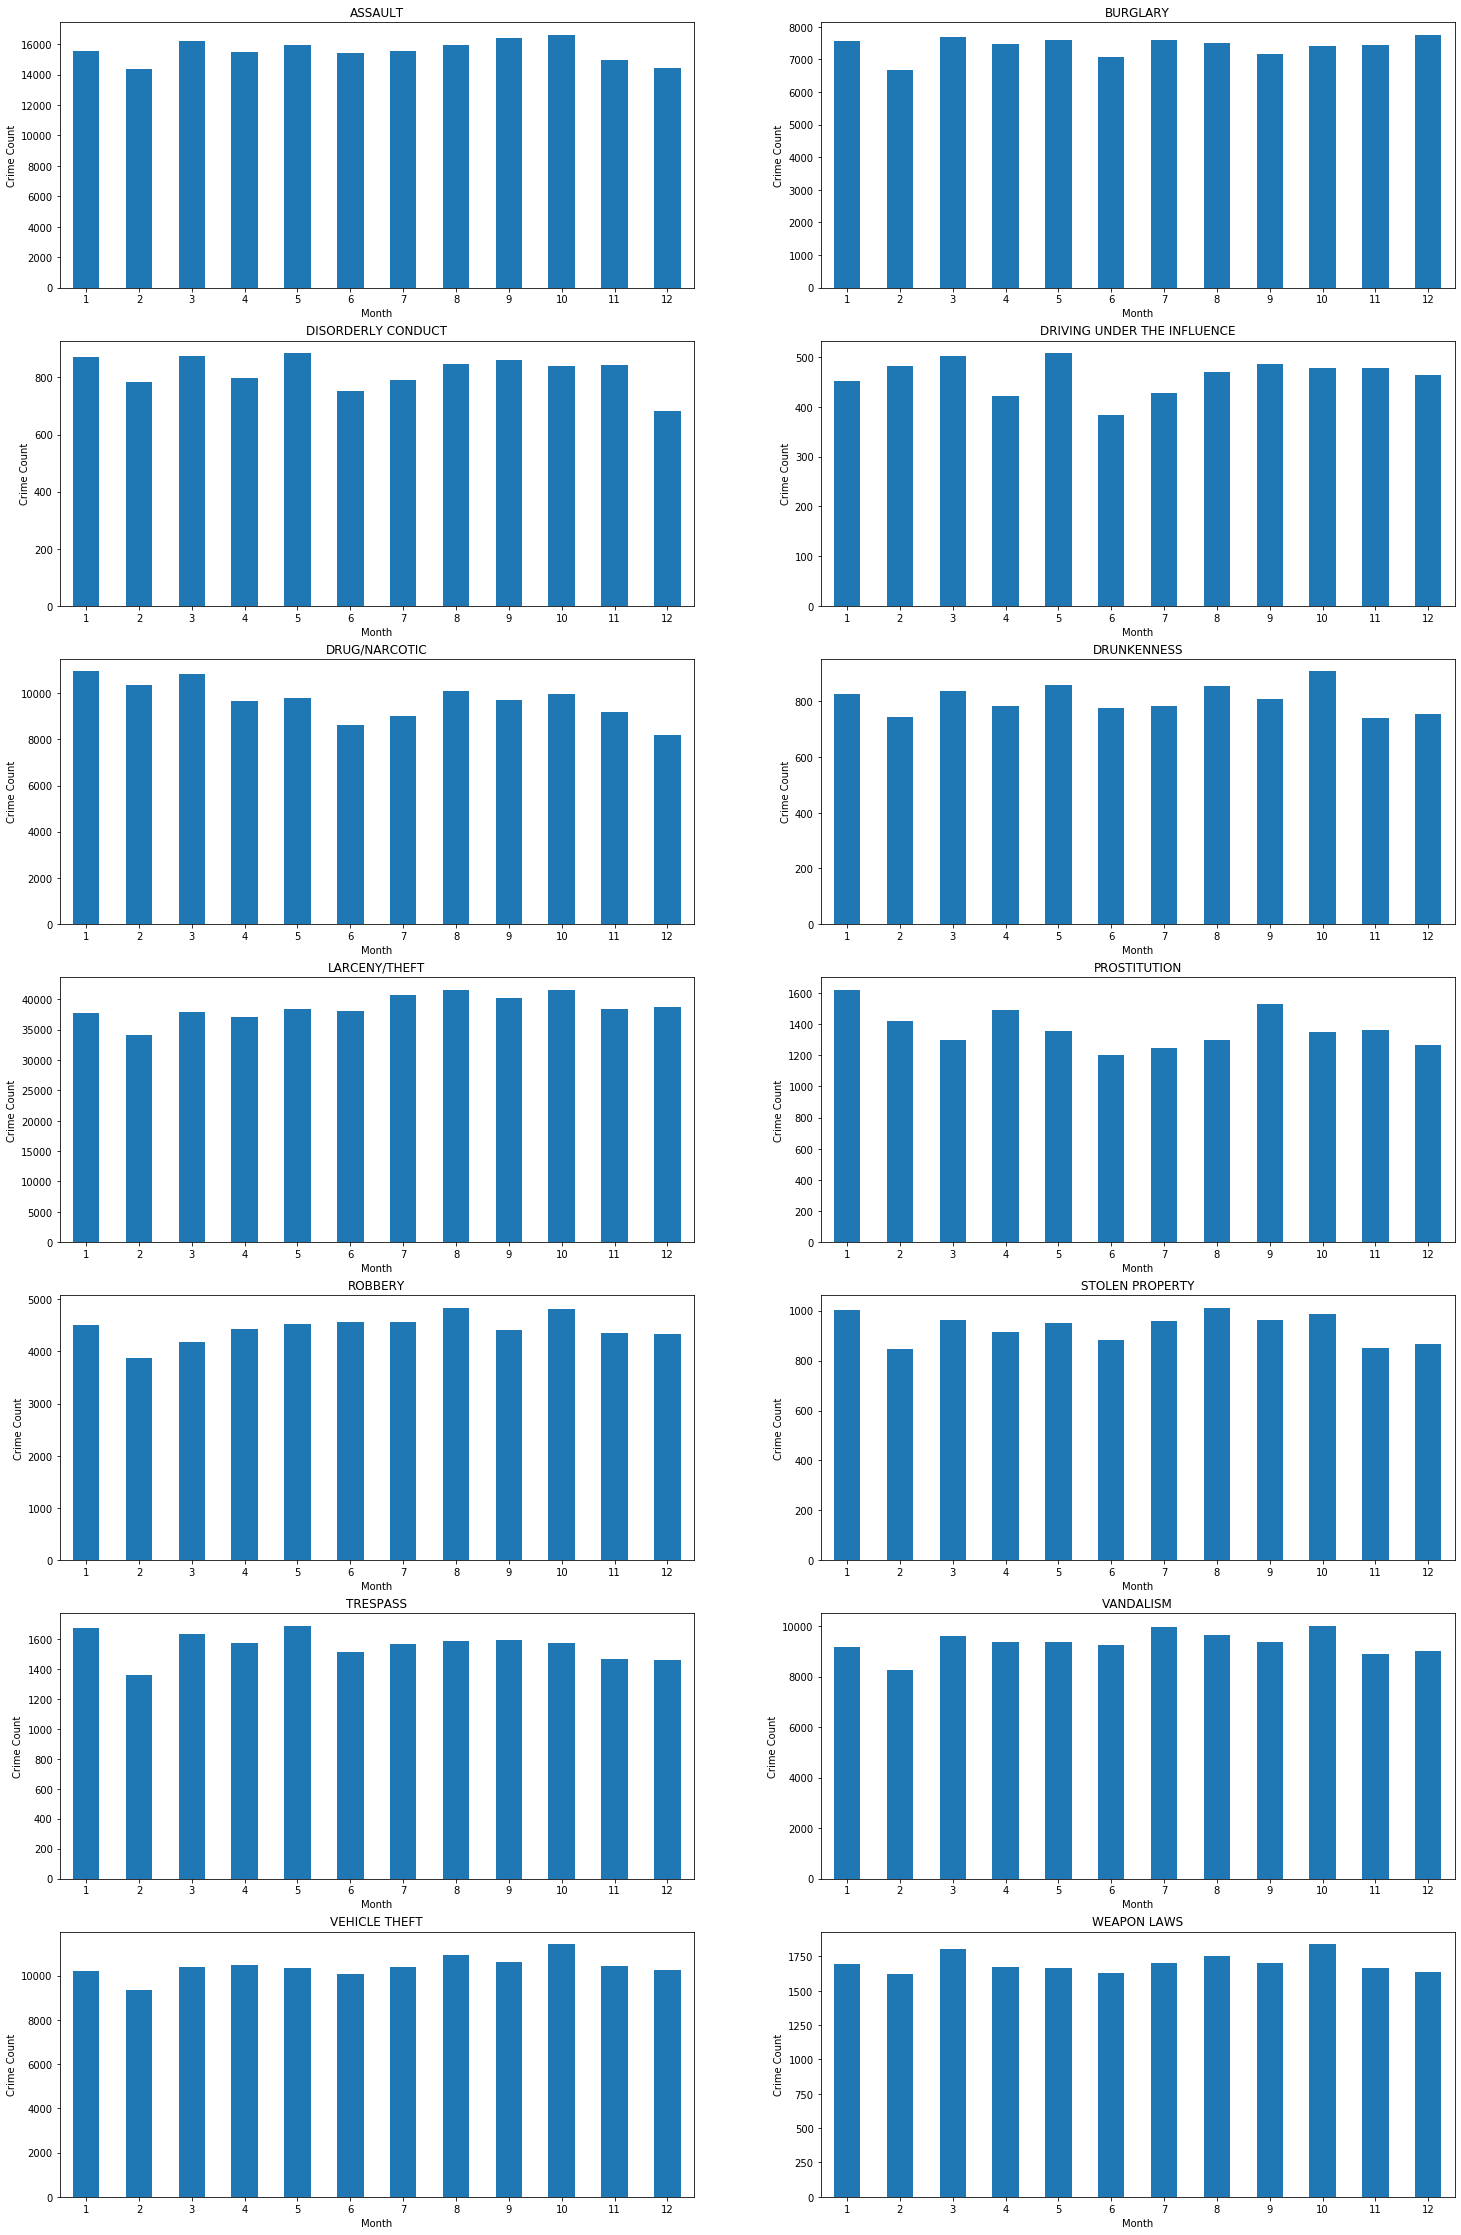

In [ ]:
# Assigning the month to a seperate column
data['Month']=pd.DatetimeIndex(data['Date']).month

# Plotting the categories by the month 
fig=plt.figure(figsize=(25,40))
j = 0
for i in focuscrimes:
    ax = plt.subplot(7,2,j+1)
    data[data.Category==i].Month.value_counts().sort_index().plot(kind='bar',title=i)
    j=j+1
    plt.xticks(rotation=0)
    plt.ylabel('Crime Count')
    plt.xlabel('Month')

### Question: *The 24 hour cycle*
We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
### Answer 
In the figures below are the 24-hour cycle depicted with the crime count. The numbers on the x axis should be interpret as: e.g. 1 means from 1 am to 2 am etc.

It can be seen on the figures, that the number of offences for most crime types again follows a clear pattern of distribution over the time frame of the day, i.e. the lowest value is at 4 or 5 in the morning and grows until it reaches a peak at midnight. 
For `BURGLARY`, `DRUG/NARCOTIC`, `LARCENY/THEFT` and `STOLEN PROPERTY`, however, the peak is at 17 and 18 (around 17 to 19 o'clock); for `DISORDERLY CONDUCT` and `TREPASS` the pattern is quite different, with a peak around 6 (6-7 o'clock) in the morning and then a steady decline.


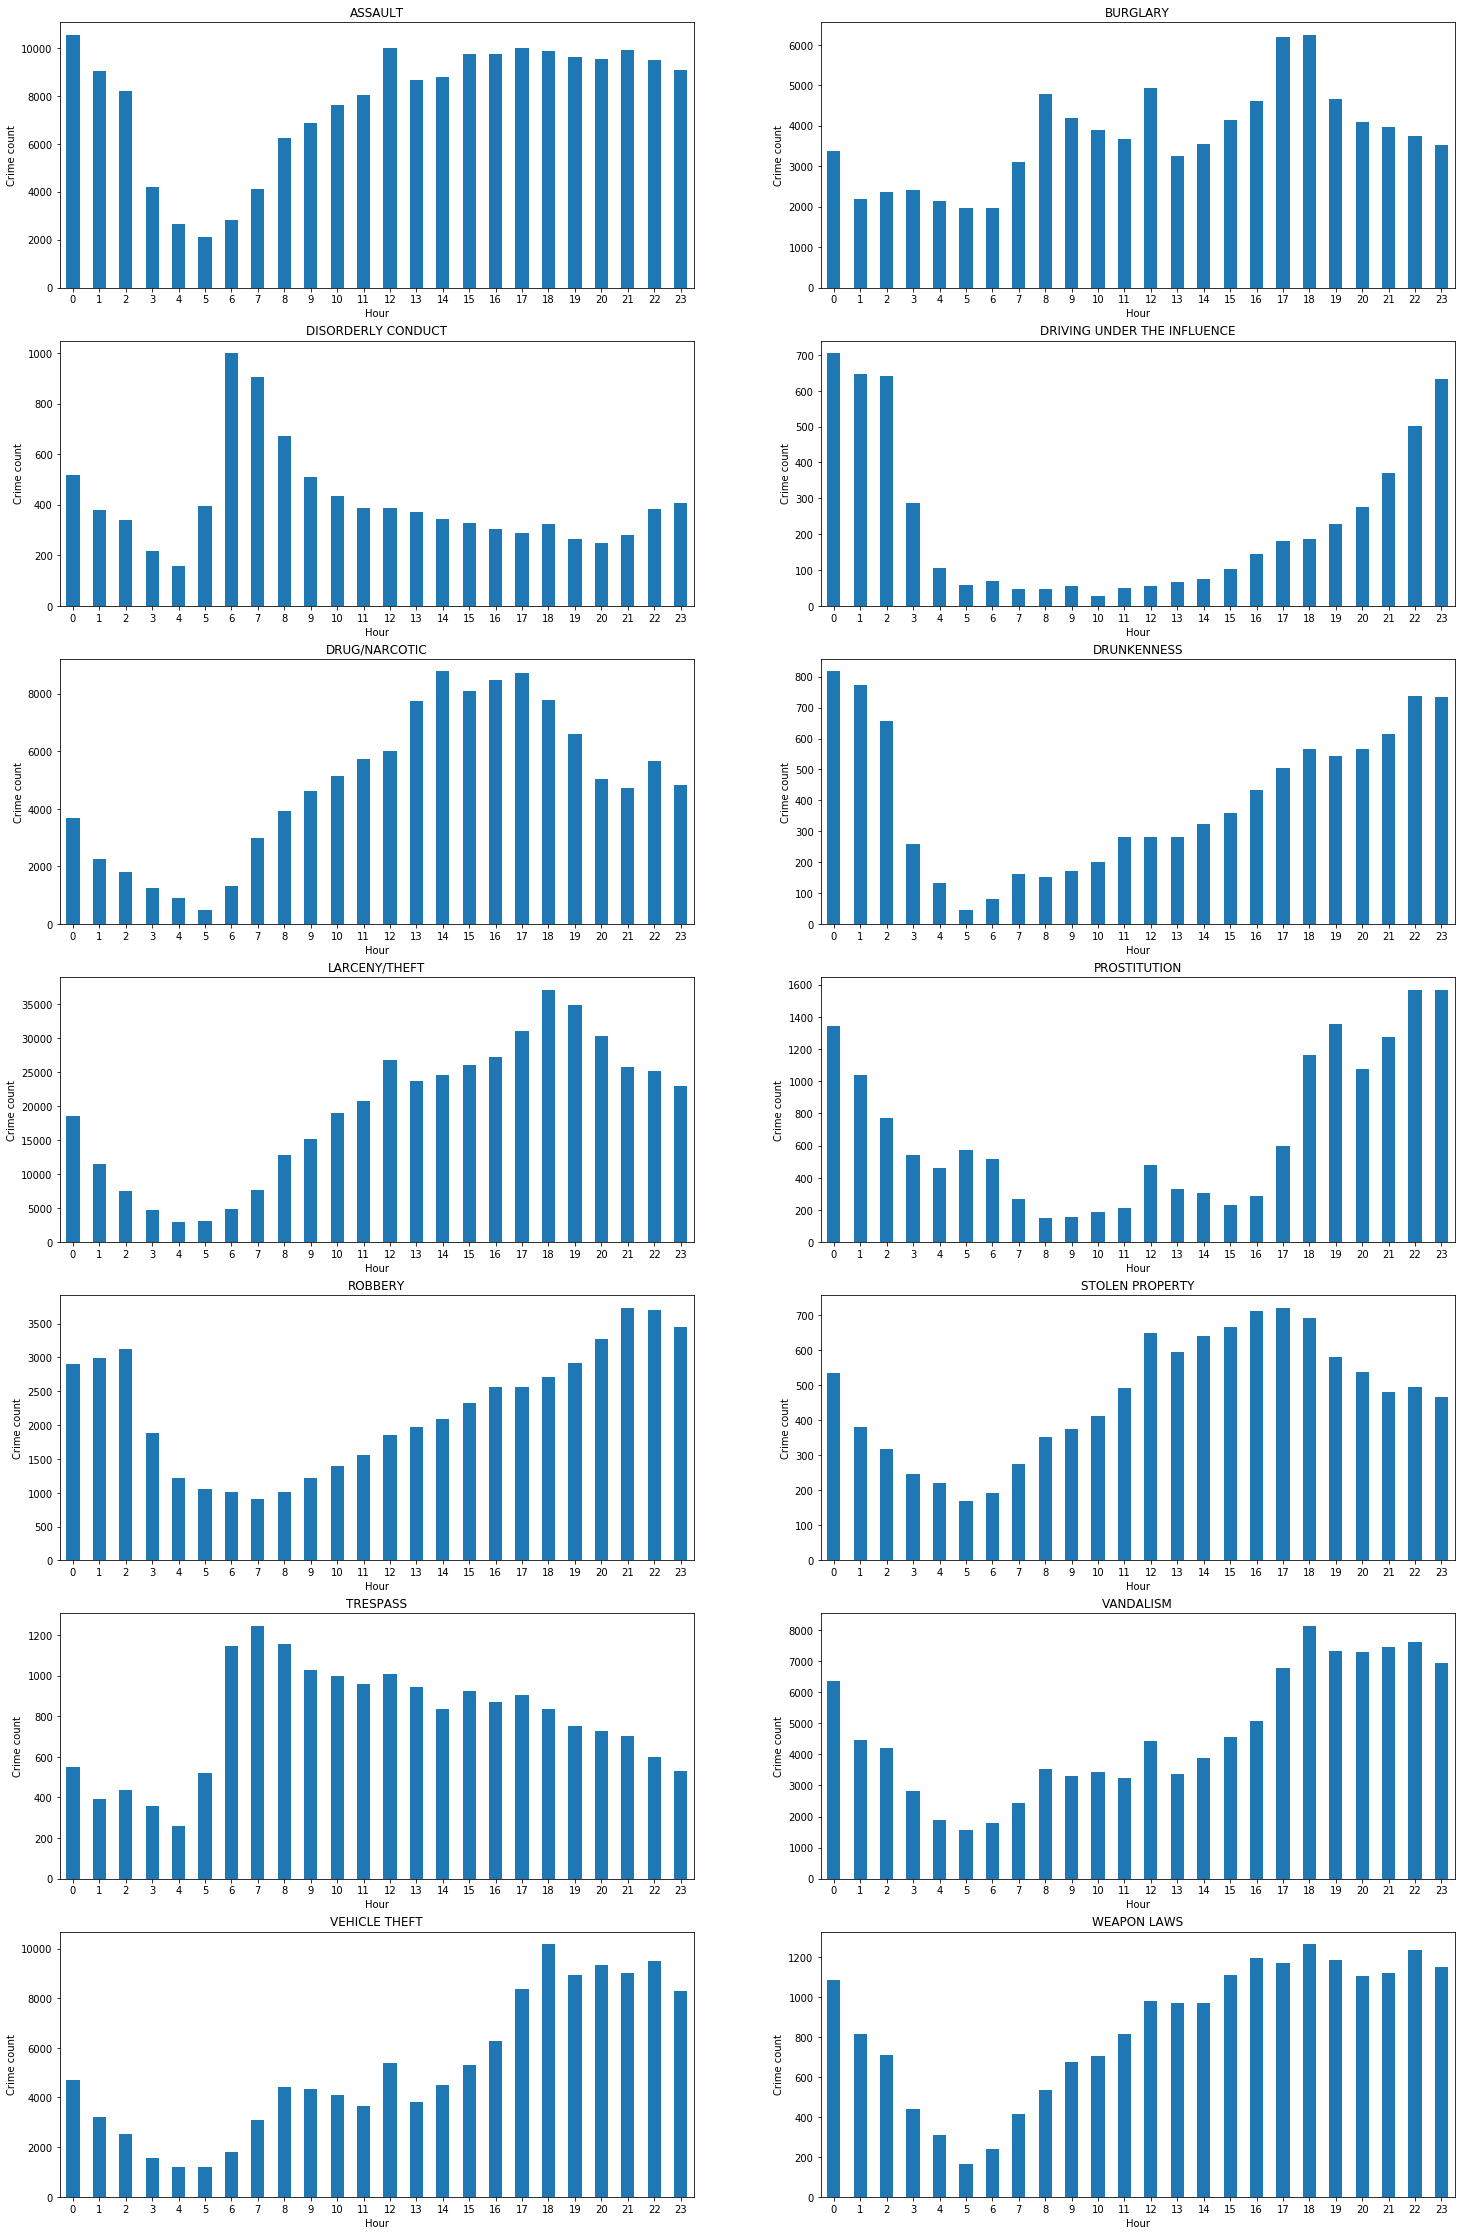

In [ ]:
# Finding the hours the crime happend 
data['time']= [datetime.strptime(i,"%H:%M") for i in data.Time]
data['hours'] = pd.DatetimeIndex(data['time']).hour

# Plotting the categories by the hour of day 
fig=plt.figure(figsize=(25,40))
j = 0
for i in focuscrimes:
    ax = plt.subplot(7,2,j+1)
    ax.set_ylabel("Crime count")
    ax.set_xlabel("Hour")
    data[data.Category==i].hours.value_counts().sort_index().plot(kind='bar',title=i)
    j=j+1
    plt.xticks(rotation=0)

### Question: *Hours of the week*
But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

### Answer: 
In the plots below are the on the x-axis is the time in hours of the week and y-axis is the crime count. Most of the graphs has a daily cycle that it goes through with same frequency of crime reported. As it is shown in the figures most graphs has local minima around the time of day shift. Some crimes has a higher frequency certain days for example `DRUNKNESS`, `DRIVING UNDER INFLUENCE`and `ASSULT` has higher counts in the weekend. 
`TREPASS` and `DISORDERLY CONDUCT` has a surprising pattern that peaks on Mondays, Tuesdays and Wednesday in the during night time. 


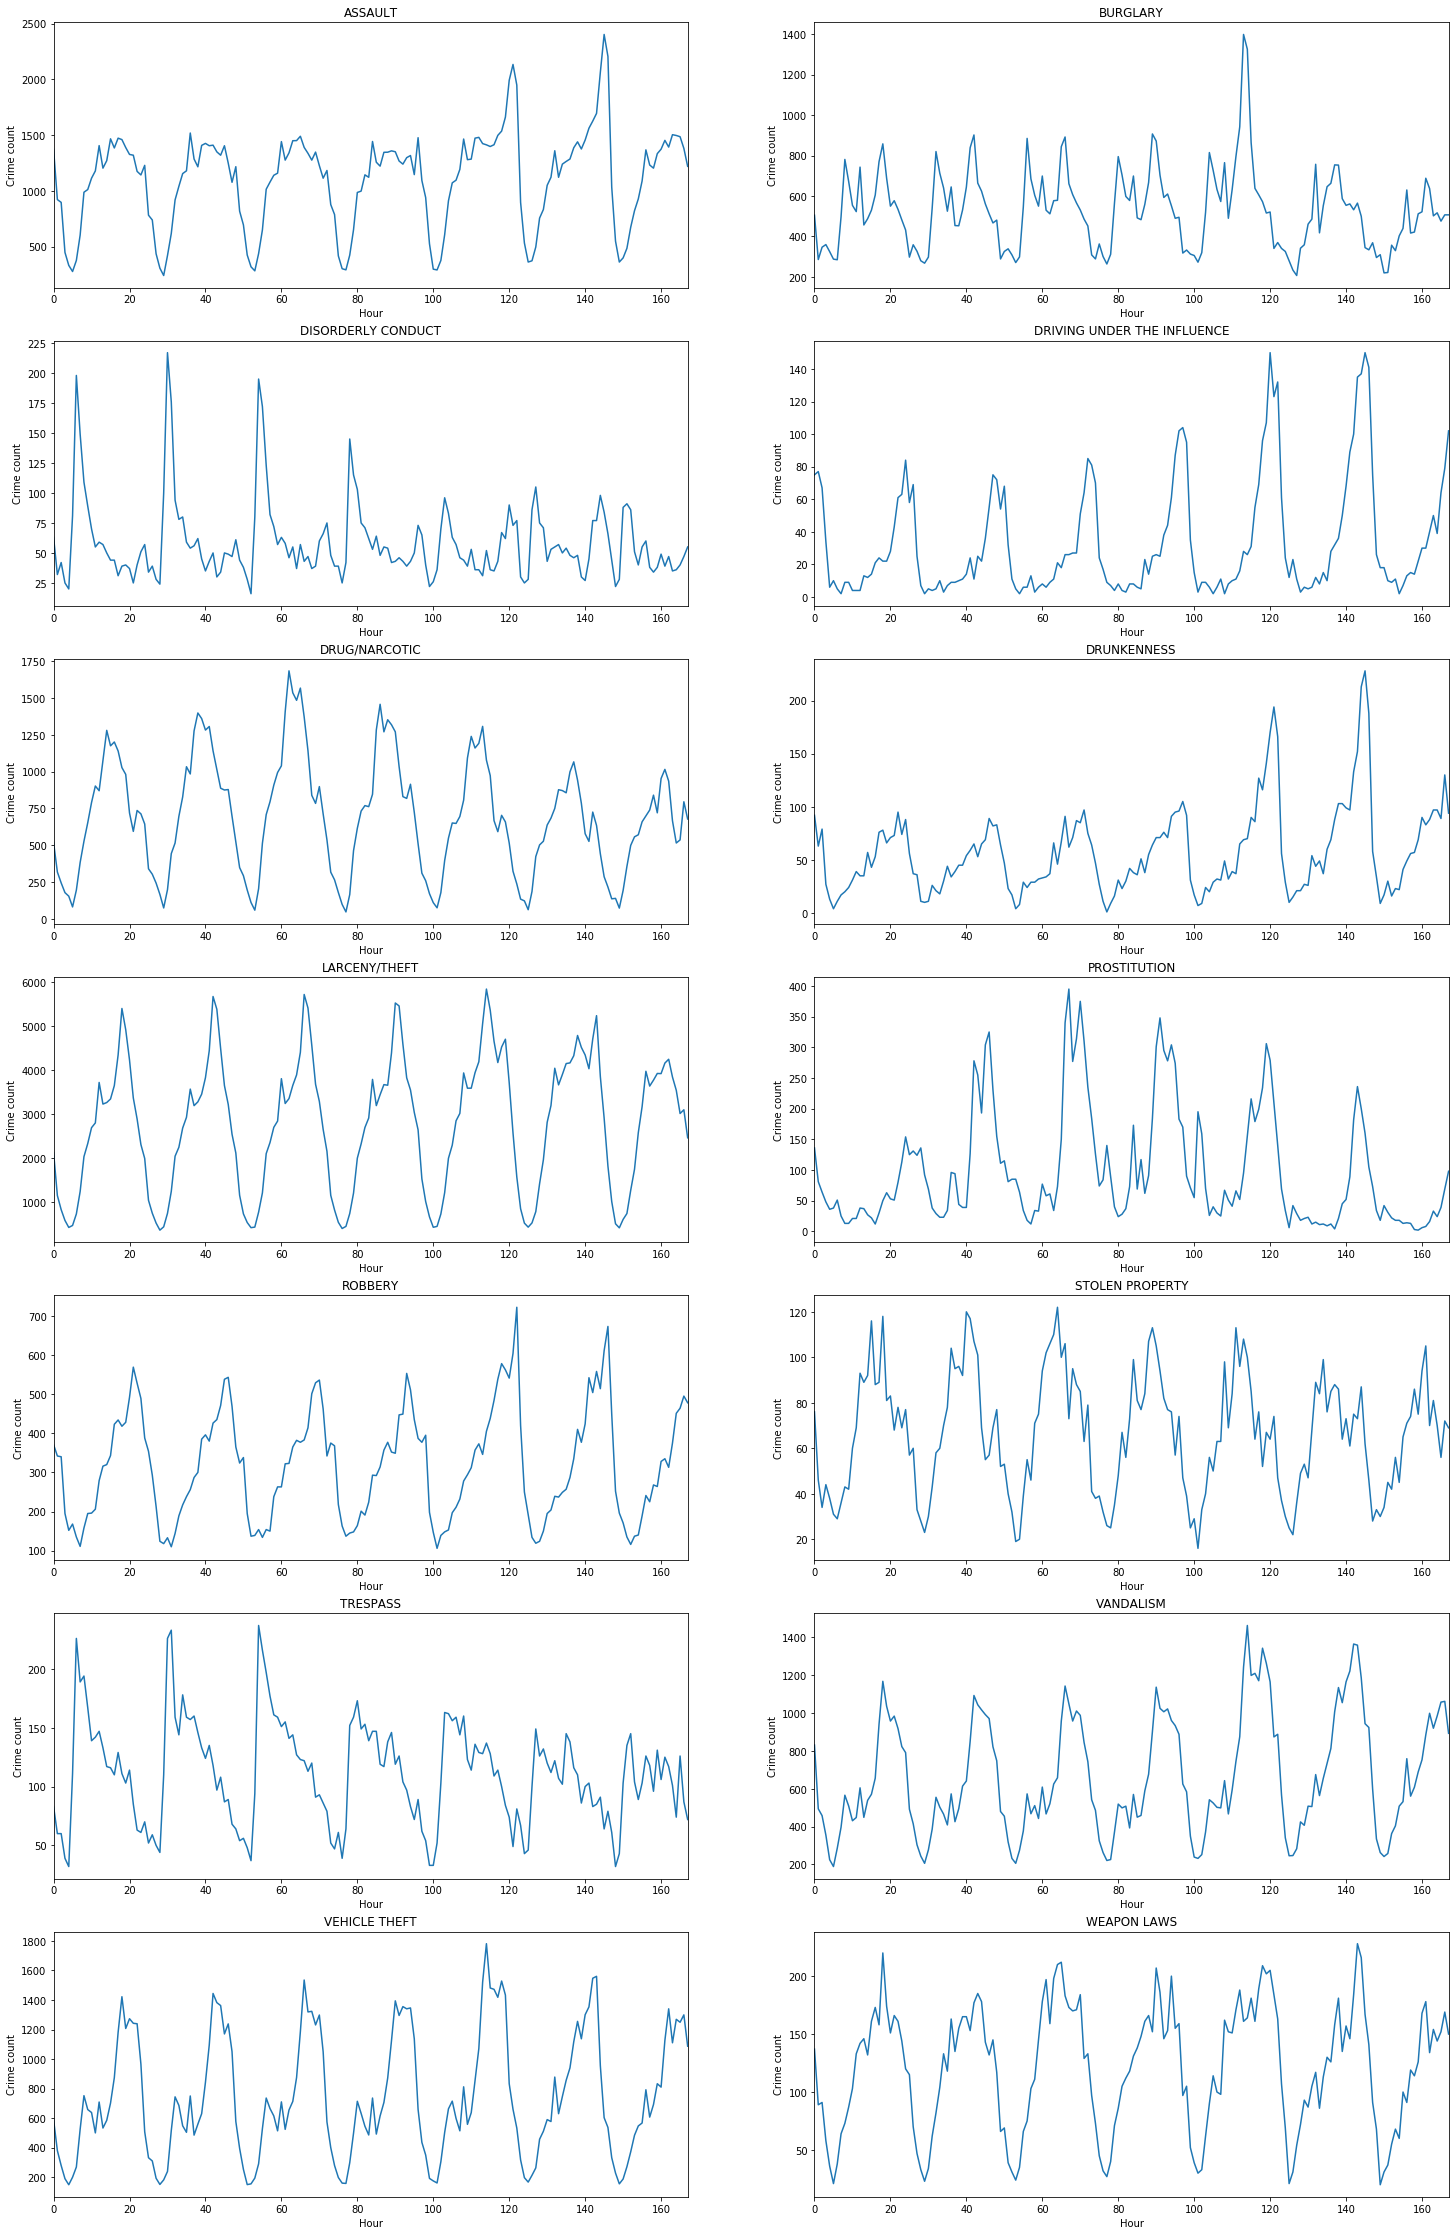

In [ ]:
# Creating a array so every hour of the week can be seen 
data.loc[data['DayOfWeek'] == 'Tuesday', 'hours'] = data.loc[data['DayOfWeek'] == 'Tuesday', 'hours']+24*1
data.loc[data['DayOfWeek'] == 'Wednesday', 'hours'] =  data.loc[data['DayOfWeek'] == 'Wednesday', 'hours'] +24*2
data.loc[data['DayOfWeek'] == 'Thursday', 'hours'] =  data.loc[data['DayOfWeek'] == 'Thursday', 'hours'] +24*3
data.loc[data['DayOfWeek'] == 'Friday', 'hours'] =  data.loc[data['DayOfWeek'] == 'Friday', 'hours'] + 24*4
data.loc[data['DayOfWeek'] == 'Saturday', 'hours'] =  data.loc[data['DayOfWeek'] == 'Saturday', 'hours'] +24*5
data.loc[data['DayOfWeek'] == 'Sunday', 'hours'] = data.loc[data['DayOfWeek'] == 'Sunday', 'hours'] + 24*6

# Plotting the categories by the hour of the week 
fig=plt.figure(figsize=(25,40))
j = 0
for i in focuscrimes:
    ax = plt.subplot(7,2,j+1)
    ax.set_ylabel("Crime count")
    ax.set_xlabel("Hour")
    data[data.Category==i].hours.value_counts().sort_index().plot(kind='line',title=i)
    j=j+1
    
    plt.xticks(rotation=0)

## Part 2: Thinking about data and visualization

*Excercise:* Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).

### Question: Pearson correlation
As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

### Answer: 
Pearson correlation is given by following mathematical formulation: 

$ \rho_{X, Y}=\frac{\operatorname{cov}(X, Y)}{\sigma_{X} \sigma_{Y}} $

Which is the covariance between variable x and y divided by the product of standard deviation of each ppopulation. 
If the pearson correlation is positive / negative, then x and y are positive correlated
If the pearson is zero then the two variables are not correlated. 

As this only gives one output, which it is a number, then it is more likely to get same coefficient while the data looks different when it is visualized by any other technique. 
Anscombe's quartet is one example of four types of data that all have the same statistical properties but looks very different when it is visualized, as seen below. 

In [ ]:
def new_name(data):
    data = data.rename(columns={0: 'x'})
    data = data.rename(columns={1: 'y'})
    return data

# load data 
data1 = pd.read_csv('Data1.tsv',sep="\t",header=None)
data2 = pd.read_csv('Data2.tsv',sep="\t",header=None)
data3 = pd.read_csv('Data3.tsv',sep="\t",header=None)
data4 = pd.read_csv('Data4.tsv',sep="\t",header=None)

data1 = new_name(data1)
data2 = new_name(data2)
data3 = new_name(data3)
data4 = new_name(data4)

# Calculate the pearson correlation 
def pearson_cor(data):
    p_cor = np.corrcoef(data.x,data.y)
    print(f'{p_cor[0,1]:4.3f}')
    return p_cor[0,1]
print('The pearson correlation coefficients')
p_coef1 = pearson_cor(data1)
p_coef2 = pearson_cor(data2)
p_coef3 = pearson_cor(data3)
p_coef4 = pearson_cor(data4)

The pearson correlation coefficients
0.816
0.816
0.816
0.817


##### comment
As we can see, the numbers for the 4 data sets are similar

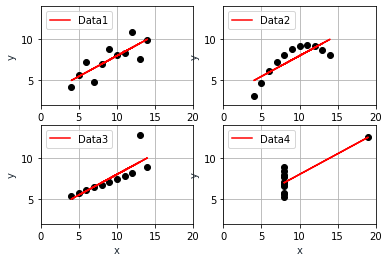

In [ ]:
slope1, intercept1, _,_,_ = stats.linregress(data1.x,data1.y)
slope2, intercept2, _,_,_ = stats.linregress(data2.x,data2.y)
slope3, intercept3, _,_,_ = stats.linregress(data3.x,data3.y)
slope4, intercept4, _,_,_ = stats.linregress(data4.x,data4.y)

ax = plt.subplot(2,2,1)
plt.plot(data1.x, data1.y, 'o', color='black');
y1 = slope1*data1.x+intercept1
plt.plot(data1.x, y1, '-r', label='Data1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
ax.set_ylim(2,14)
ax.set_xlim(0,20)

ax = plt.subplot(2,2,2)
plt.plot(data2.x, data2.y, 'o', color='black');
y2 = slope2*data2.x+intercept2
plt.plot(data2.x, y2, '-r', label='Data2')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
ax.set_ylim(2,14)
ax.set_xlim(0,20)

ax = plt.subplot(2,2,3)
plt.plot(data3.x, data3.y, 'o', color='black');
y3 = slope3*data3.x+intercept3
plt.plot(data3.x, y3, '-r', label='Data3')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
ax.set_ylim(2,14)
ax.set_xlim(0,20)

ax = plt.subplot(2,2,4)
plt.plot(data4.x, data4.y, 'o', color='black');
y4 = slope4*data4.x+intercept4
plt.plot(data4.x, y4, '-r', label='Data4')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')

ax.set_ylim(2,14)
ax.set_xlim(0,20)
plt.grid()
plt.show()

##### Comment 
As seen these figures shows that location of the points are significantly different while the pearson correlation is similar.

### Question: Difference between bar-char and histogram
What is the difference between a bar-chart and a histogram?

### Answer: 
Histogram is a visualisation method, where the data is group into bins bins. The total value range of the data set can be divided into small intervals ( bin width) and counts for number of point that falls in each bin. The data in Histogram should be continuous.  

Whereas the bar chart is used for counting the number of occurance in each of the category of interest. Which the x-axis of the bar chart is discountinuous as different classes (or cateogry). 

Both are great when dealing with larger data sets. 

### Question: Bin size
I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

### Answer:
The bin size / width is chosen too large, then too much detailed information about the data set will get lost. 
An example could be that two bars (one that accounts for large number and one with small count) are merged together, then the resulted bin will be smoothed. 

One rule of chosing the bin size is scott's rule[1], which is 

$ w =3.5 \cdot \frac {\sigma }{\sqrt[3]{n}}$ 

Where the width is dependent of the standard deviation and number of points. As the data grows then there's more data to get a smaller width. In order to use this method, the data has to be gaussian distributed. 
As most of the litterature mentioned, the correct size of the bins is dependent on the type of data. 

[1] *Chapter 2, Data Analysis with Open Source Tools by Philipp K. Janert*

## Part 3: Generating important plot types

*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

### Question: *Jitter-plot*
First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

### Answer 
The jitter-plot below is for `VEHICLE THEFT` in the hour 19.00 to 20.00. From the plot is it clear that most of the times recorded are noted down at the nearest hour and not the exact time.

In [ ]:
#select time interval and crime category
data["Date"] = pd.to_datetime(data["Date"])
data_date = data.set_index("Date")
data_ts = data_date.loc['2017-01-01':'2017-04-01']
data_ts_theft = data_ts[data_ts.Category=="VEHICLE THEFT"]

In [ ]:
#choose an hour time slot
data_ts_theft = data_ts_theft.set_index('Time').sort_values(by="Time").loc['19:00':'20:00']
data_ts_theft = data_ts_theft.reset_index()

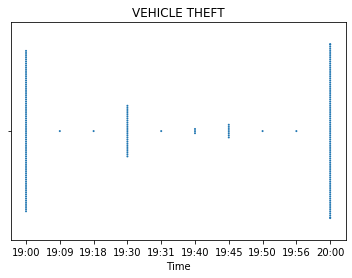

In [ ]:
plt.title('VEHICLE THEFT')
ax = sns.swarmplot(x=data_ts_theft['Time'],linewidth=0.01, size= 2)

### Question: *Histograms of geographic pattern*
Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
* This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram).
* Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.

### Answer:
In the histograms below are the crime types `VEHICLE THEFT` and `ASSULT` used in the time frame 01/01/2017 to 04/04/2017. The number of `ASSULT` is a lot higher then `VEHICLE THEFT` and peaks at certain latitudes.  `VEHICLE THEFT` also has peak at the same latitude location close to 37.78. Both crimes seems be lowest around latitude location 37.82. 

In [ ]:
#select a time interval
data["Date"] = pd.to_datetime(data["Date"])
data_date = data.set_index("Date")
data_ts2 = data_date.loc['2017-01-01':'2017-04-01']

#pick two crime-types
data_ts2_theft = data_ts2[data_ts2.Category=="VEHICLE THEFT"]
data_ts2_assault = data_ts2[data_ts2.Category=="ASSAULT"]

Text(0, 0.5, 'Crime count')

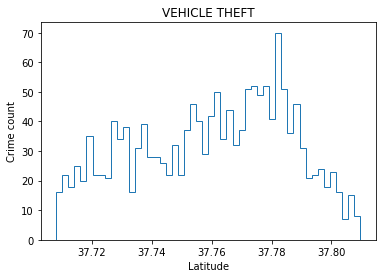

In [ ]:
#plot histogram to show the geographical distribution of vehicle theft
plt.hist(data_ts2_theft['Y'],bins=50, histtype="step")
np.histogram(data_ts2_theft['Y'],bins=50)
plt.title('VEHICLE THEFT')
plt.xlabel("Latitude")
plt.ylabel("Crime count")

Text(0, 0.5, 'Crime count')

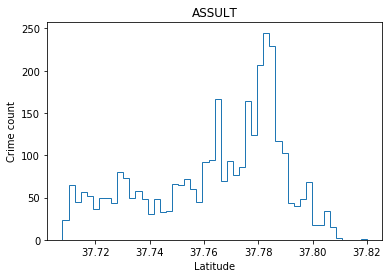

In [ ]:
#plot histogram to show the geographical distribution of assault
np.histogram(data_ts2_assault['Y'],bins=50)
plt.hist(data_ts2_assault['Y'],bins=50, histtype="step")
plt.title('ASSULT')
plt.xlabel("Latitude")
plt.ylabel("Crime count")

## Part 4: A bit of geo-data

*Exercise*: A new take on geospatial data using Folium (see the Week 4 exercises for full info and tutorials). 

Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.

### Question: 
First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command `folium.Map([lat, lon], zoom_start=13)`, where you'll have to look up San Francisco's longitude and latitude.
* Next, use the the coordinates for SF City Hall `37.77919, -122.41914` to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).
![example](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/city_hall_2020.png)

### Answer: 
Following figure shows a map over San Fransico and the City Hall is marked with blue (i) icon

In [ ]:
# plotting the map of San Francisco using the folium package
map_SF = folium.Map(location=[37.773972, -122.431297],zoom_start = 13)
# adding the city hall to the map with given coordinates
folium.Marker([37.77919, -122.41914], popup='City Hall',icon=folium.Icon(color='blue')).add_to(map_SF)
map_SF

### Question 
Now, let's plot some more data (no need for popups this time). Select a couple of months of data for `'DRUG/NARCOTIC'` and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. 
We can call this a kind of visualization a *point scatter plot*.

### Answer: 
The data has been filtered, so it only shows `DRUG/NARCOTIC` in the period June and July in 2016. The red dots in the map below are where the crimes happened. 

In [ ]:

# Sorting data / extracting only for june and july
narcotic_data = data[data.Category=='DRUG/NARCOTIC']
narcotic_data = narcotic_data[(pd.DatetimeIndex(narcotic_data['Date']).year == 2016) & 
                          ((pd.DatetimeIndex(narcotic_data['Date']).month==6) |
                          (pd.DatetimeIndex(narcotic_data['Date']).month==7))]

In [ ]:
# for each row in the narcotic data 
for idx, row in narcotic_data.iterrows():
    folium.CircleMarker([row['Y'], row['X']], radius = 1, popup='Drug/Narcotic', color = 'red').add_to(map_SF)
map_SF  

## Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 



> *Exercise*: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when when we bin the data. We explore this process in the exercise below.
>
> The exercise is simply this:
> * For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

### Question `PROSTITUTION`
In the hourly activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.

### Answer 
In our graph above there is not the same peak mentioned, this is because we used only a partition of the data as we downloaded the .csv file. 
But if we look at the plot linked to this question, then the peak could be the police have some weekly routines where they patrol different parts of town. So that time of the week they are in a certain area known for prostitution. 

Without notice this error then one would believe that Wednesday is a special day where they would use extra resources in order to deal with prostitution. 

### Question timestamp: 
When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.

### ANSWER 
Crime time recording occurs more often at 15 or 10 minute integer points in time, and there may be errors caused by human recording habits in that some police officers do not record the exact number of minutes when recording time, but instead taking close integer records.

Not paying attention to these data errors may lead to misjudgements in the analysis of crime time stamps, which under natural conditions should be randomly distributed over different numbers of minutes, and the diagram shows the behavioural preferences of the recorder, when the analysis of crime times in the dimension of minutes is meaningless.

### Euestion Heat map: 
And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/crime_hot_spot.png).

### Answer 
From the heat map, it appears that the Hall of Justice is a hotspot for sex crimes and that police stations can be found around the Hall of Justice, presumably the police are more accustomed to taking offenders to police stations and registering crimes after questioning, leading to the recording of crime locations around the Hall of Justice.

Without noticing these errors, more police might be assigned to the Hall of Justice according to the heatmap result. It can lead to a waste of police resources.